# Module 3 - Introduction Statistical Hypothesis testing


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

**Example 1**  
Jars of jam are filled by a machine. It has been found that the quantity of jam in a jar is normally distributed and has mean 351.2g, with standard deviation 4.1g. It is believed that the settings of the mean amount on the machine might have been altered accidentally.
To test this a random sample of 40 jars is taken and the mean quantity per jar is calculated. Assume that the standard deviation has not been altered.

### The right-tailed $z$-test

The mean quantity per jar is found to be 352.8g.

Plot

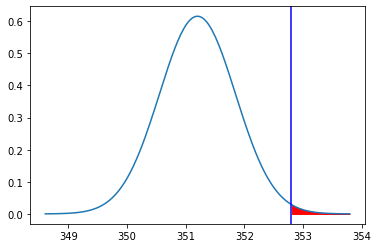

In [3]:
n = 40
m = 351.2
s = 4.1
m_sample = 352.8
s_sample = s / math.sqrt(n)

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= m_sample), color='red')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue")

Method 1

In [4]:
p_value = stats.norm.sf(m_sample,loc = m, scale = s_sample)
print(f"p_value is: {p_value}") #0.6% kans dat het gemiddelde 352.8 is

p_value is: 0.006791255041867345


Method 2

g_value:352.26630419514487


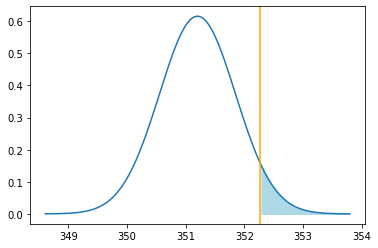

In [5]:
g_value = stats.norm.isf(0.05,loc =m, scale = s_sample )
print(f"g_value:{g_value}")

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g_value), color='lightblue')
# Show the mean with an orange line
plt.axvline(g_value, color="orange")

### The left-tailed $z$-test

The mean quantity per jar is found to be 350.4g.

Method 1

p_value is: 0.10859035286979785


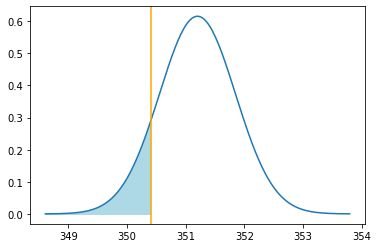

In [6]:
n = 40
m = 351.2
s = 4.1
m_sample = 350.4
s_sample = s / math.sqrt(n)

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= m_sample), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="orange")

p_value = stats.norm.cdf(m_sample,loc = m, scale = s_sample)
print(f"p_value is: {p_value}") #10% kans dat het gemiddelde 350.4 is




Method 2

g_value:350.1336958048551


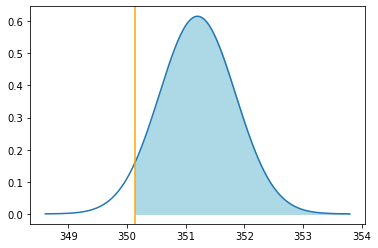

In [7]:
g_value = stats.norm.isf(0.95,loc =m, scale = s_sample )    #rechter ondergrens
print(f"g_value:{g_value}")

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g_value), color='lightblue')
# Show the mean with an orange line
plt.axvline(g_value, color="orange")

### The two-tailed $z$-test

The mean quantity per jar is found to be 351.4g.

Method 1

p_value is: 0.6211547154615831


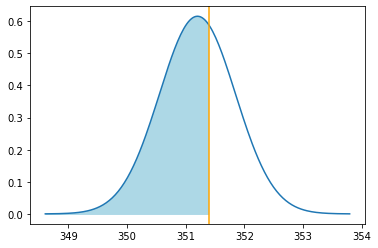

In [8]:
n = 40
m = 351.2
s = 4.1
m_sample = 351.4
s_sample = s / math.sqrt(n)

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= m_sample), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="orange")

p_value = stats.norm.cdf(m_sample,loc = m, scale = s_sample)
print(f"p_value is: {p_value}") #62% kans dat het gemiddelde 351.4 is

Method 2

g_value1:349.9294201837756
g_value1:352.47057981622436


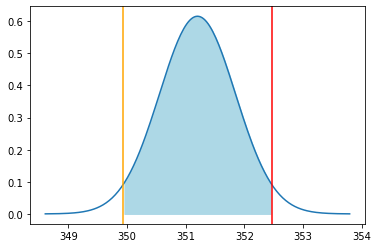

In [9]:
#ondergrens
g_value1 = stats.norm.isf(0.975,loc =m, scale = s_sample )
print(f"g_value1:{g_value1}")
#bovengrens
g_value2 = stats.norm.isf(0.025,loc =m, scale = s_sample )
print(f"g_value1:{g_value2}")

# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g_value1) & (dist_x <= g_value2), color='lightblue')
# Show the mean with an orange line
plt.axvline(g_value1, color="orange")
plt.axvline(g_value2, color="red")




**Definitions**  

**Hypothesis** = Idea that has yet to be proven: statement regarding the
numeric value of a population parameter  
**Hypothesis Test** = verification of a statement about the values of one or
multiple population parameters  
**Null Hypothesis $H_0$** Base hypothesis, we start with assuming it is true.   
**Alternative Hypothesis ($H_1$, $H_a$)** Conclusion if the null hypothesis is
unlikely to be true.  
Take care in the language that you use. 
* If you accept $H_0$, never say that this is because the evidence supports it. You can only conclude there is not significant evidence against $H_0$.
* If you reject $H_0$, say that there is evidence that the mean of the probability is not ...  

The basis of *all* tests is to see if the statistic calculated from the observations lies in the most extreme part of this distribution - called the **critical region**, or the **rejection region**.  
You reject $H_0$ if the observed value lies in this region. All other values lie in the **acceptance region** of the test. The probability of this happening when $H_0$ is actually true is called the size of the test. You use 5% as the common default size.

**Critical region** or **rejection region** = The region of values rejecting the null hypothesis.  
**Acceptance region** or **rejection region** = The region of values supporting the null hypothesis.  
**Critical value g** = Boundary of the critical region

The principle of **hypothesis testing** is to compare where the value of an observed statistic (the **test statistic**) lies within the sampling distribution under the null hypothesis.  
If it would be classed as a 'rare event' (and the **significance level of a test** is whatever level we use to judge 'rare') then you look for an alternative explanation.

**Type I error**  
The null hypothesis is actually true and you reject it.  

**Type II error**  
You accept the null hypothesis and it was not true


**Requirements for 𝑧-test**  
● The sample needs to be random  
● The sample size needs to be sufficiently large (𝑛 ≥ 30)  
● The test statistic needs to have a normal distribution  
● The standard deviation of the population, 𝜎, is known  
Sometimes these assumptions will not hold and in this case we can not
use the 𝑍-test!

**Example 2**  
The pulse of healthy young adults can be modelled by a normal distribution with mean 80 and standard deviation 9. It is thought that trained athletes may have lower pulse rates than usual.  
A random sample of 12 trained athletes is taken and their pulses are recorded: 48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50.  
Test at the 5% level of significance whether trained athletes have lower pulse rates than normal healthy young adults.

In [10]:
pulses = [48, 52, 59, 45, 57, 52, 44, 58, 56, 44, 63, 50]
n = len(pulses)
m = 80
s = 9

m_sample = np.mean(pulses)
s_sample = np.std(pulses,ddof=1)

print(s_sample)


6.343691688790073


p_value is: 5.283891352937751e-09


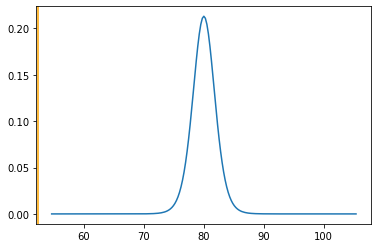

In [11]:
# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.t.pdf(dist_x,loc= m, scale = s_sample/math.sqrt(n),df = n-1)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of m_sample
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= m_sample), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="orange")

p_value = stats.t.cdf(m_sample,loc = m, scale = s_sample/math.sqrt(n),df = n-1)
print(f"p_value is: {p_value}") #bijna 0% kans dat de gemiddelde hartslag op 80 ligt



In [16]:

g_value = stats.t.isf(0.95,loc = m, scale = s_sample/math.sqrt(n),df = n-1)
print(f"p_value is: {g_value}") 

p_value is: 76.71125709804512
